In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


### helper Function to Plot the graph

In [2]:
def show_bgr(img, title="Image"):
    """Display a BGR OpenCV image with matplotlib in RGB order."""
    if img is None:
        raise ValueError("Image is None. Check the path.")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [8]:
def show_gray(img, title="Image"):
    """Display a grayscale image."""
    if img is None:
        raise ValueError("Image is None. Check the path.")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

#### To Load the image input 


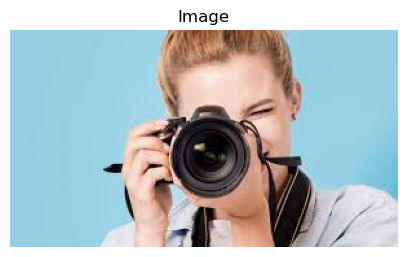

In [19]:
img_path="D:\Python project\Python Project for my understanding\images.jpg"
img=cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


show_bgr(img)


In [20]:
from more_itertools import padded


def convolve2d(img,kernel):
    if len(img.shape)!=2:
        raise ValueError("Input image must be grayscale(2D array)")
    k_h,k_w=kernel.shape
    pad_h=k_h//2
    pad_w=k_w//2
    kernel_flipped=np.flipud(np.fliplr(kernel))
    padded=np.pad(img,((pad_h,pad_h),(pad_w,pad_w)),mode='constant',constant_values=0)
    out=np.zeros_like(img,dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i + k_h, j:j + k_w]
            out[i, j] = np.sum(region * kernel_flipped)
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

avg_kernel = np.ones((3, 3), np.float32) / 9.0
manual_blur = convolve2d(gray, avg_kernel)
show_gray(manual_blur, "Manual Convolution: 3x3 Averaging Filter")


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x31bd3f7f::Set<1,-1,-1>,struct cv::impl::A0x31bd3f7f::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


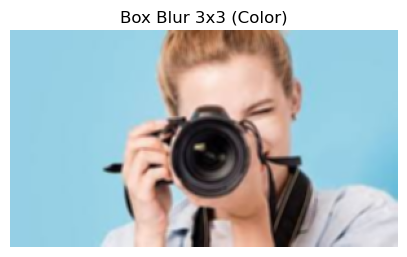

In [21]:
def apply_kernel_cv(img,kernel,title_prefix=""):
    filter=cv2.filter2D(img,ddepth=-1,kernel=kernel)
    show_bgr(filter,f"{title_prefix}")
    return filter

box_kernel_3x3 = np.ones((3, 3), np.float32) / 9.0
_ = apply_kernel_cv(img, box_kernel_3x3, "Box Blur 3x3 (Color)")

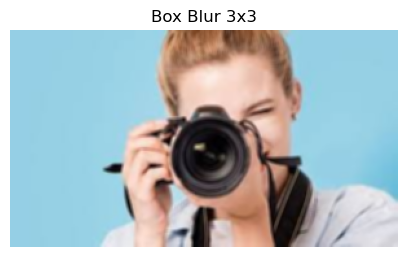

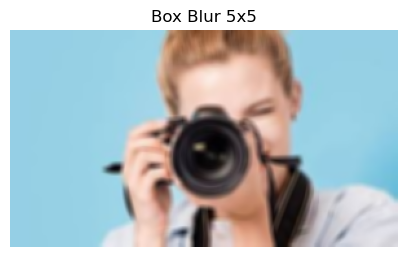

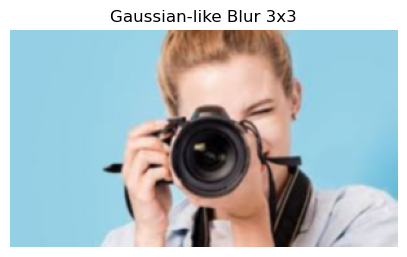

In [23]:
box_kernel_5x5=np.ones((5,5),np.float32)/25.0
_ = apply_kernel_cv(img, box_kernel_3x3, "Box Blur 3x3")
_ = apply_kernel_cv(img, box_kernel_5x5, "Box Blur 5x5")
gaussian_kernel_3x3 = (1/16.0) * np.array([[1, 2, 1],
                                           [2, 4, 2],
                                           [1, 2, 1]], dtype=np.float32)
_ = apply_kernel_cv(img, gaussian_kernel_3x3, "Gaussian-like Blur 3x3")

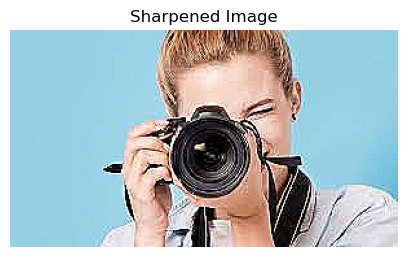

In [25]:
sharpen_kernel=np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]
                       ],dtype=np.float32)
_ = apply_kernel_cv(img, sharpen_kernel, "Sharpened Image")

In [29]:
#edge 
sobel_x=np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]],dtype=np.float32)
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)


edges_x=convolve2d(gray,sobel_x)
edges_y=convolve2d(gray,sobel_y)

show_gray(edges_x, "Sobel X (Horizontal Edges)")
show_gray(edges_y, "Sobel Y (Vertical Edges)")




error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x31bd3f7f::Set<1,-1,-1>,struct cv::impl::A0x31bd3f7f::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
